In [ ]:
# %pip install selenium
# %pip install webdriver_manager
# %pip install seaborn

In [31]:
from selenium import webdriver
from selenium.webdriver.edge.service import Service
from webdriver_manager.microsoft import EdgeChromiumDriverManager
from selenium.webdriver.support.wait import WebDriverWait
from datetime import datetime
import time
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
# get browser, maximise window and open web page
browser = webdriver.Edge(service= Service(EdgeChromiumDriverManager().install()))
browser.maximize_window()

browser.get('https://www.tripadvisor.com/Hotel_Review-g187849-d2340336-Reviews-Armani_Hotel-Milan_Lombardy.html')

In [24]:
# wait for cookies button, click accept
cookies_wait = WebDriverWait(browser, timeout=3)
cookies_accept= cookies_wait.until(lambda b: b.find_element('xpath', '//*[@id="onetrust-accept-btn-handler"]'))
cookies_accept.click()

In [25]:
expand = browser.find_element('xpath', ".//div[contains(@data-test-target, 'expand-review')]")
if expand:
    expand.click()

In [20]:
reviews = browser.find_elements('xpath', ".//div[@data-reviewid]")
reviews

[<selenium.webdriver.remote.webelement.WebElement (session="2277c1133f5fa5bf6fd757e88d1f633c", element="D173EAB20AE8D69779D6AADB87744548_element_52")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2277c1133f5fa5bf6fd757e88d1f633c", element="D173EAB20AE8D69779D6AADB87744548_element_53")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2277c1133f5fa5bf6fd757e88d1f633c", element="D173EAB20AE8D69779D6AADB87744548_element_54")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2277c1133f5fa5bf6fd757e88d1f633c", element="D173EAB20AE8D69779D6AADB87744548_element_55")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2277c1133f5fa5bf6fd757e88d1f633c", element="D173EAB20AE8D69779D6AADB87744548_element_56")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2277c1133f5fa5bf6fd757e88d1f633c", element="D173EAB20AE8D69779D6AADB87744548_element_57")>,
 <selenium.webdriver.remote.webelement.WebElement (session="2277c1133f5fa5bf6fd757e88d1f

In [11]:
try:
    with open('ArmaniHotelReviews.csv', 'w', encoding='utf-8') as csvFile:

        csvWriter = csv.writer(csvFile)

        for i in range(10): #loop per 10 pagine

            time.sleep(3)

            reviews = browser.find_elements('xpath', ".//div[@data-reviewid]") #cerca le review

            for review in reviews:

                rating_bubble = review.find_element('xpath', ".//span[contains(@class, 'ui_bubble_rating bubble_')]") #prende le review

                score = rating_bubble.get_attribute("class").split("_")[3] #prende gli score delle review

                date_obj = review.find_element('xpath', ".//span[@class='teHYY _R Me S4 H3']")

                date_rec = date_obj.text.replace("Date of stay: ", '')

                date = datetime.strptime(date_rec, '%B %Y')

                title = review.find_element('xpath', ".//div[contains(@data-test-target, 'review-title')]").text

                comment = review.find_element('xpath', ".//span[@class='QewHA H4 _a']").text.replace("\n", " ")

                csvWriter.writerow([score, date.year, date.month, title, comment])

            browser.find_element('xpath', './/a[@class="ui_button nav next primary "]').click()
finally:
    browser.quit()

In [22]:
reviews = browser.find_elements('xpath', ".//div[@data-reviewid]") #cerca le review

for review in reviews:

                rating_bubble = review.find_element('xpath', ".//span[contains(@class, 'ui_bubble_rating bubble_')]") #prende le review
                print(rating_bubble)
                score = rating_bubble.get_attribute("class").split("_")[3] #prende gli score delle review
                print(score)

<selenium.webdriver.remote.webelement.WebElement (session="2277c1133f5fa5bf6fd757e88d1f633c", element="D173EAB20AE8D69779D6AADB87744548_element_68")>
50
<selenium.webdriver.remote.webelement.WebElement (session="2277c1133f5fa5bf6fd757e88d1f633c", element="D173EAB20AE8D69779D6AADB87744548_element_69")>
30
<selenium.webdriver.remote.webelement.WebElement (session="2277c1133f5fa5bf6fd757e88d1f633c", element="D173EAB20AE8D69779D6AADB87744548_element_70")>
50
<selenium.webdriver.remote.webelement.WebElement (session="2277c1133f5fa5bf6fd757e88d1f633c", element="D173EAB20AE8D69779D6AADB87744548_element_71")>
50
<selenium.webdriver.remote.webelement.WebElement (session="2277c1133f5fa5bf6fd757e88d1f633c", element="D173EAB20AE8D69779D6AADB87744548_element_72")>
50
<selenium.webdriver.remote.webelement.WebElement (session="2277c1133f5fa5bf6fd757e88d1f633c", element="D173EAB20AE8D69779D6AADB87744548_element_73")>
50
<selenium.webdriver.remote.webelement.WebElement (session="2277c1133f5fa5bf6fd757e

In [33]:

df = pd.read_csv('ArmaniHotelReviews.csv',names = ['score', 'year', 'month', 'title', 'comment'])

df.head(8)

,score,year,month,title,comment
0,50,2023,8,EB,"Everything is fine, except for the cold feel o..."
1,30,2023,7,First class team,The team at the Armani were amongst the best I...
2,50,2023,7,Modernist Milano,The Armani is a strikingly modern hotel in the...
3,50,2023,6,Modern luxurious stay with very friendly staff,We stayed in this hotel for 5 nights to explor...
4,50,2023,5,Better than heaven a true testament of Armani ...,No question this is the only place to stay in ...
5,50,2023,5,Outstanding time at Armani in Milan,Fantastic experience at the Armani Hotel in Mi...
6,40,2023,4,armani hotel milano,"location was great, staff not so great, asked ..."
7,50,2023,3,"Exceptional service, design and amenities",Exceptional hotel -- the service and amenities...


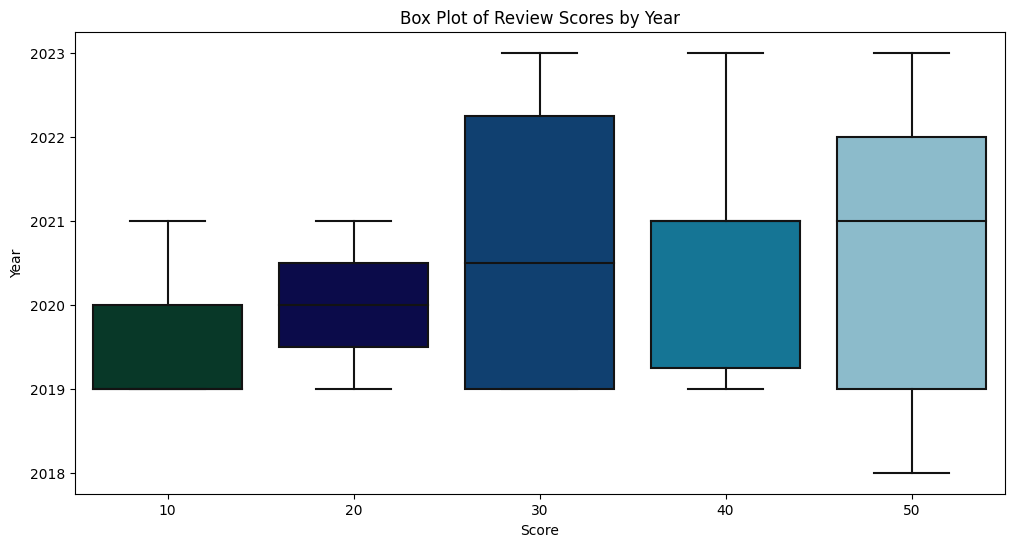

In [37]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=df, x='score', y='year', palette='ocean')

plt.xlabel('Score')

plt.ylabel('Year')

plt.title('Box Plot of Review Scores by Year')

plt.show()

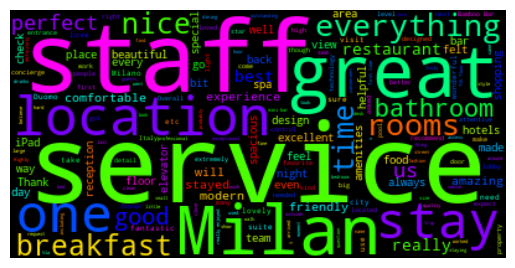

In [54]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Definisci le stopwords e unisci le recensioni
stopwords = set(STOPWORDS)
stopwords.update(["armani","hotel","room"])
reviews = " ".join(review for review in df.comment)

# Crea la nuvola di parole con una palette personalizzata
wordcloud = WordCloud(stopwords=stopwords, colormap='gist_rainbow').generate(reviews)

# Mostra la nuvola di parole
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


C:\Users\LucaBai\AppData\Local\Temp\ipykernel_35860\2204505601.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


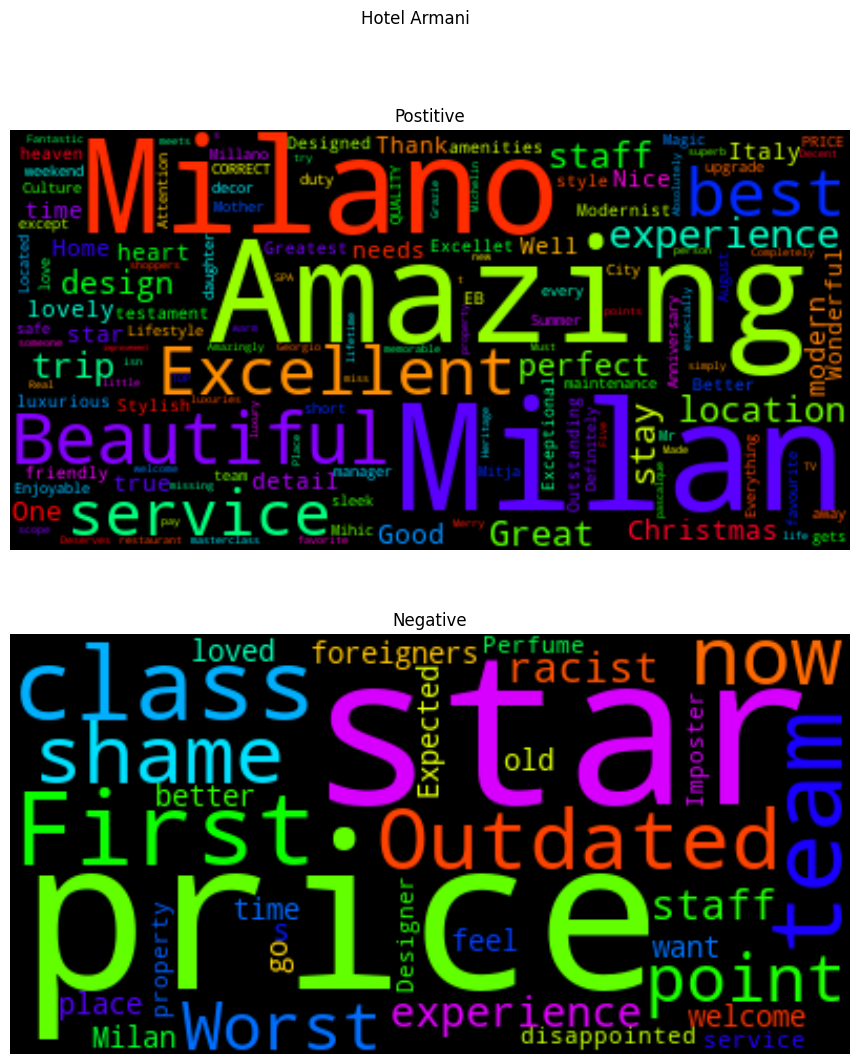

In [63]:
df['sentiment'] = df['score'].apply(lambda rating : +1 if rating > 30 else -1)

positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

pos = " ".join(review for review in positive.title)
wordcloud_pos = WordCloud(stopwords=stopwords, colormap='gist_rainbow').generate(pos)
neg = " ".join(review for review in negative.title)
wordcloud_neg = WordCloud(stopwords=stopwords, colormap='gist_rainbow').generate(neg)

fig, axes = plt.subplots(2,1,figsize = (12,12))
axes[0].imshow(wordcloud_pos, interpolation ='bilinear')
axes[0].axis("off")
axes[0].set_title('Postitive')
axes[1].imshow(wordcloud_neg, interpolation ='bilinear')
axes[1].axis("off")
axes[1].set_title('Negative')
fig.suptitle('Hotel Armani')
fig.show()


